In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Zadanie 1

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

width = 9
height = 6
square_size = 0.025

objp = np.zeros((height * width, 1, 3), np.float64)
objp[:, 0, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

objp = objp + square_size

objpoints = []
imgpoints = []

img_width = 640
img_height = 480
image_size = (img_width, img_height)

path = ""
image_dir = path + "pairs/"

number_of_images = 50
for i in range(1, number_of_images):
    new_path = (image_dir + "left_%02d.png" % i)
    img = cv2.imread(new_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    Y, X, channels = img.shape

    if (ret == True):
        minRx = corners[:,:,0].min()
        maxRx = corners[:,:,0].max()
        minRy = corners[:,:,1].min()
        maxRy = corners[:,:,1].max()

        border_threshold_x = X/12
        border_threshold_y = Y/12

        x_thresh_bad = False
        if (minRx < border_threshold_x):
            x_thresh_bad = True
        
        y_thresh_bad = False
        if(minRy < border_threshold_y):
            y_thresh_bad = True

        if(y_thresh_bad==True) or (x_thresh_bad==True):
            continue
    
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray, corners, (3, 3), (-1, -1), criteria)

        imgpoints.append(corners2)

        cv2.drawChessboardCorners(img, (width, height), corners2, ret)
        cv2.imshow("Corners", img)
        cv2.waitKey(100)
    else:
        print("Chessboard couldn't detected. Image pair: ", i)
        continue
cv2.waitKey(5000)
cv2.destroyAllWindows()



In [3]:
N_OK = len(objpoints)
K = np.zeros((3,3))
D = np.zeros((4,1))
rvecs = [np.zeros((1,1,3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1,1,3), dtype=np.float64) for i in range(N_OK)]

ret, K, D, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        image_size,
        K,
        D,
        rvecs,
        tvecs,
        calibration_flags,
        (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, image_size, cv2.CV_16SC2)

/tmp/ipykernel_13158/3693362458.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


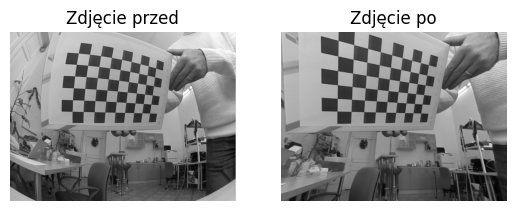

In [4]:
I = cv2.imread("pairs/left_23.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

undistorted_image = cv2.remap(I, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

fig, ax = plt.subplots(1,2)
ax[0].imshow(I, cmap='gray')
ax[0].axis("off")
ax[0].set_title("Zdjęcie przed")
ax[1].imshow(undistorted_image, cmap='gray')
ax[1].axis("off")
ax[1].set_title("Zdjęcie po")
fig.show()

## Zadanie 2

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

width = 9
height = 6
square_size = 0.025

objp = np.zeros((height * width, 1, 3), np.float64)
objp[:, 0, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

objp = objp + square_size

objpoints = []
imgpointsLeft = []
imgpointsRight = []

In [8]:
img_width = 640
img_height = 480
image_size = (img_width, img_height)

path = ""
image_dir = path + "pairs/"

number_of_images = 50
for i in range(1, number_of_images):
    new_path_left = (image_dir + "left_%02d.png" % i)
    new_path_right = (image_dir + "right_%02d.png" % i)
    img_left = cv2.imread(new_path_left)
    img_right = cv2.imread(new_path_right)
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

    ret_left, corners_left = cv2.findChessboardCorners(gray_left, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    ret_right, corners_right = cv2.findChessboardCorners(gray_right, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    Y, X, channels = img_left.shape

    if ((ret_left == True) and (ret_right == True)) :
        minRx_left = corners_left[: ,: ,0].min ()
        maxRx_left = corners_left[: ,: ,0].max ()
        minRy_left = corners_left[: ,: ,1].min ()
        maxRy_left = corners_left[: ,: ,1].max ()

        minRx_right = corners_right [: ,: ,0].min ()
        maxRx_right = corners_right [: ,: ,0].max ()
        minRy_right = corners_right [: ,: ,1].min ()
        maxRy_right = corners_right [: ,: ,1].max ()

        border_threshold_x = X /12
        border_threshold_y = Y /12
        x_thresh_bad = False
        if ( minRx_left < border_threshold_x ) or ( minRx_right < border_threshold_x ):
            x_thresh_bad = True
        y_thresh_bad = False
        if ( minRy_left < border_threshold_y ) or ( minRy_right < border_threshold_y ):
            y_thresh_bad = True
        if ( y_thresh_bad == True ) or ( x_thresh_bad == True ):
            continue

    if ((ret_left == True) and (ret_right == True)):
        objpoints.append(objp)

        corners2_left = cv2.cornerSubPix(gray_left, corners_left, (3, 3), (-1, -1), criteria)
        corners2_right = cv2.cornerSubPix(gray_right, corners_right, (3, 3), (-1, -1), criteria)
        imgpointsLeft.append(corners2_left)
        imgpointsRight.append(corners2_right)

        cv2.drawChessboardCorners(img_left, (width, height), corners2_left, ret_left)
        cv2.drawChessboardCorners(img_right, (width, height), corners2_right, ret_right)
        cv2.imshow("Corners right", img_right)
        cv2.imshow("Corners left", img_left)
        cv2.waitKey(10)
    else:
        print("Chessboard couldn't detected. Image pair: ", i)
        continue
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
K_left = np.zeros((3,3))
K_right = np.zeros((3,3))
D_left = np.zeros((4,1))
D_right = np.zeros((4,1))

R = np.zeros((1, 1, 3), dtype=np.float64)
T = np.zeros((1, 1, 3), dtype=np.float64)


imgpointsLeft = np . asarray ( imgpointsLeft , dtype = np . float64 )
imgpointsRight = np . asarray ( imgpointsRight , dtype = np . float64 )
( RMS , _ , _ , _ , _ , rotationMatrix , translationVector ) = cv2 . fisheye . stereoCalibrate (
objpoints , imgpointsLeft , imgpointsRight ,
K_left , D_left ,
K_right , D_right ,
image_size , R, T,
cv2 . CALIB_FIX_INTRINSIC ,
( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.01) )
R2 = np . zeros ([3 ,3])
P1 = np . zeros ([3 ,4])
P2 = np . zeros ([3 ,4])
Q = np . zeros ([4 ,4])

error: OpenCV(4.11.0) /io/opencv/modules/calib3d/src/fisheye.cpp:1411: error: (-215:Assertion failed) fabs(norm_u1) > 0 in function 'InitExtrinsics'
